회귀 모델 훈련 방법

1. 정규방정식: 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함
2. 경사 하강법: 모델 파라미터를 조금씩 바꿔가면서 비용 함수를 훈련 세트에 대해 최소화 (결과는 같음)

선형 회귀 모델 예측<br>
> $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... \theta_nx_n$ <br>
이 때<br>
$\hat{y}$: 예측값<br>
$n$: 특성 수<br>
$x_i$ :i번째 특성 값<br>
$\theta_j$: j번째 모델 파라미터 $(\theta_0, \theta_1, ...)$. 즉 편향 OR 각 변수의 계수 OR가중치

ex. 어떤 기업의 예상 매출을 예측하는 모델을 만들었을 때 다음과 같은 결과가 나왔다면 <br>
> 예상 매출 = 100 + 3\*전분기 매출 + 2\*현금 보유량

- $\hat{y}$: 예상 매출<br>
- $(\theta_0, \theta_1, \theta_2)$: (100, 3, 2)<br>
- $(x_1, x_2)$: (전분기 매출, 현금 보유량)

위 식의 벡터 형태
> $\hat{y} = h_\theta(\mathbf{x}) = \theta^T \cdot (\mathbf{x})$<br>

여기서<br>
- $\theta$: 모델 파라미터 벡터. 모습은 열 벡터. 즉 $( (\theta_0), (\theta_1), ... , (\theta_n))$<br>
- $\theta^T$: $\theta$ 전치. 즉 행 벡터<br>
- $\mathbf{x}$: $x_0$ ~ $x_n$까지 담고 있는 샘플의 특성 벡터. 이 때 $x_0$은 항상 1 ($\theta_0$과 맞춰주기 위해 있는 것) <br>
- $\theta^T \cdot (\mathbf{x})$: $\theta^T$와 $\mathbf{x}$의 점곱. 결과는 $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... \theta_nx_n$<br>
- $h_\theta$: 모델 파라미터 $\theta$를 사용한 가설 함수

평균 제곱 오차<br>
<br>
\*** 값이 커질 수록 모델을 이용한 예측과 실제 값 간 오차가 크다는 의미<br>
<br>
계산식<br>
> $
\begin{array} 
\mbox{MSE}(\mathbf{X}, h_θ)
&=& {1 \over m} \sum_{i=1}^{m} (\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2 \\
&=& {1 \over m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
\end{array}
$

식의 의미: 예측한 값과 실제 값의 차이를 제곱한 것의 평균<br>
제곱을 하는 이유: 제곱하지 않으면 음수 차이가 나왔을 때 이걸 더하면 전체 차이가 줄어들기 때문 <br>
\>>> 분산 구할 때 (편차의 제곱의 평균)을 하는 이유와 같다 <br>
\>>> RMSE가 SQRT(MSE)인 이유와 표준 편차가 SQRT(분산)인 이유도 같다<br>
<br>
여기서
- $\mathbf{X}$: 훈련 세트. 즉 펭귄 데이터셋 전체
- $x^{(i)}$: 훈련 세트에서 i번째 데이터. 즉 펭귄 데이터셋에서 156번째 행(혹은 튜플, 샘플, etc.)

ex. 매출을 예상하는 모델의 MSE는 다음과 같이 구할 수 있다 <br>
> $ {1 \over (m)} \sum_{i=1}^{m} \mbox{(해당 분기 예상 매출 - 해당 분기 실제 매출)}^2$

# θ를 찾는 방법 1. 정규방정식

정규방정식 기본 형태
> $\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}$ <br>
여기서<br>
$\hat{\theta}$: 비용함수(MSE, RMSE, $R^2$ etc.)를 최소화시키는 $\theta$. 즉, 제일 예쁜 $\theta$<br>
$\mathbf{y}$: 타깃 벡터 $y^{(1)}$~$y^{(m)}$. 즉, 우리가 예측하고자 하는 값

*** 단변량이어도(즉 특성이 하나여도) 1차원이 아닌, 2차원으로 표현해야 함 <br>
ex.
- [ 0, 3, 2, 9, ... ] ( X )
- [ [ 0 ], [ 3 ], [ 2 ], [ 9 ], ... ] ] ( O )

In [1]:
""" 테스트 """

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

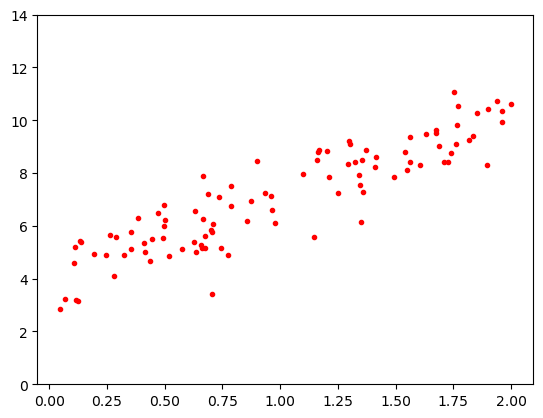

In [2]:
plt.plot(X, y, linewidth=0, marker='o', markersize=3, color="red")
plt.ylim([0, 14])
plt.show()

In [3]:
""" 정규방정식 구현 1: numpy 선형대수 기능을 이용한 경우 """

X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # = (bold XT dot bold X)inv dot XT dot y

theta_best

array([[3.97911694],
       [3.12005456]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97911694],
       [10.21922605]])

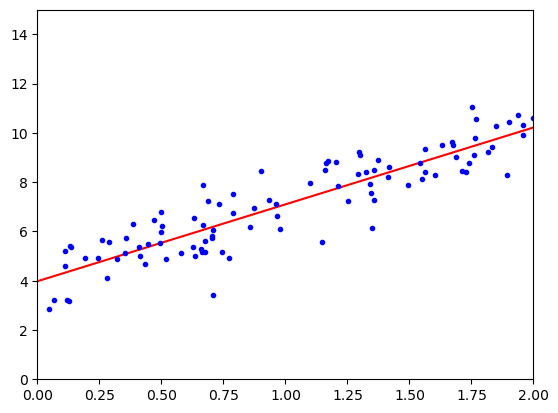

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
""" 정규방정식 구현 2: sklearn.linear_model의 LinearRegression 클래스"""

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # coef_: 가중치 ( = θ1, 2, 3, ...), intercept_: 편향 ( = θ0)

(array([3.97911694]), array([[3.12005456]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.97911694],
       [10.21922605]])

### 정규방정식의 시간복잡도

모델 훈련: $\mathbf{\mathit{O}}(n^{2.4} \sim n^3)$<br>
&nbsp; 이유: 정규방정식은 $(n+1) \times (n+1)$ 크기가 되는 $\mathbf{X}^T \cdot \mathbf{X}$의 역행렬을 계산하기 때문 (n: 특성 수)<br>
&nbsp; 대신, 훈련 세트의 샘플 수에 대해선 점곱 횟수만 많아지므로 선형적으로 증가한다 (즉 $\mathbf{\mathit{O}}(m)$)<br>

예측: 샘플 수와 특성 수에 선형적으로 증가 >>> 예측 속도는 빠르다 ($\mathbf{\mathit{O}}(mn)$)

# 2. 경사 하강법 (Gradient Descent)

비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것

상세
1. θ를 임의의 값으로 시작 ( aka 무작위 초기화)
2. 한 번에 조금씩 비용함수가 감소되는 방향으로 진행 (비용함수가 무엇인지는 상관 없음: MSE, R^2 etc.)
3. 비용함수의 전역 최소에 가까워질 때까지 $\theta$를 미세 조정

### 경사하강법의 도전과제

1. 스텝의 크기가 중요하다.
    - 즉 비용함수가 줄어들도록 매개변수를 조정하는 정도가 중요하다
    - 이는 학습률 하이퍼파라미터로 결정한다
    - 학습률이 너무 작으면 시간이 오래걸리거나, 최적값을 찾기 전에 종료되고 너무 크면 발산할 수도 있다
2. 비용함수에 따라 지역 최소값이나 평지를 만날 수도 있다 (단, MSE는 볼록 함수, 연속)
3. 경사 하강법 사용 전에는 반드시 모든 특성이 같은 스케일을 갖도록 해야 한다
    - 이유: 특성 스케일에 따라 전역 최소에 도달하는 시간이 달라질 수 있기 때문
    - 이를 위해 StandardScaler와 같은 스케일러를 쓸 수 있다

비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 것을 모델의 파라미터 공간에서 찾는다고 한다<br>
모델의 파라미터 공간에서 찾는 것은 <br>
모델의 비용 함수를 최소화하는 파라미터 조합, <br>
즉, 최적 성능을 내도록 하는 파라미터 조합을 찾아내는 작업

### 2.1 배치 경사 하강법: 전체 훈련셋을 이용한 파라미터 탐색

목표: MSE를 최소화하는 파라미터 조합을 찾아내는 것<br>
구현: MSE를 각 $\theta_j$에 대한 편도함수를 만들어 $\theta_j$ 에 대한 비용 함수에 전체 훈련세트를 넣어서 나온 그래디언트가 가장 작은 값이 나올 때까지 $\theta_j$를 조정한다 <br>
이를 식으로 표현하면
> 비용함수(MSE)의 편도함수 <br>
${\partial \over \partial \theta_j} MSE(\theta) = {2 \over m} \sum_{i=1}^m (\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)}){x_j}^{(i)}$<br>
<br>이를 벡터 표현으로 바꾸면 <br>
$
\nabla_{\theta} MSE(\theta) = 
\begin{pmatrix} 
{\partial \over \partial \theta_0} MSE(\theta) \\
{\partial \over \partial \theta_1} MSE(\theta) \\
\vdots \\ 
{\partial \over \partial \theta_n} MSE(\theta) 
\end{pmatrix}
= {2 \over m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - \mathbf{y})
$
<br>

과 같이 표현한 식에 전체 훈련셋 $\mathbf{X}$를 넣었을 때 그 결과가 가장 작게 나오는 파라미터 조합 $\theta$를 찾아낸다고 할 수 있다. <br>
여기서 $\theta$를 조절하기 위해 학습률 $\eta$가 사용되며, 다음에 시도해볼 파라미터 조합은 다음과 같이 정할 수 있다
> $\theta^\mbox{(next step)} = \theta - \eta \nabla_{\theta} MSE(\theta)$

즉, 다음에 시도해볼 $\theta$는 현재 $\theta$에서 현재 $\theta$로 구한 $\nabla_{\theta} MSE(\theta)$에 $\eta$를 곱한 값, 즉 $\nabla_{\theta} MSE(\theta)$의 $\eta * 100$%만큼 뺀 값으로 한다<br>


초기 theta: [ 0.11426085573055994, 2.150058902798372 ]
마지막 theta: [ 3.9791169383469036, 3.120054556958421 ]


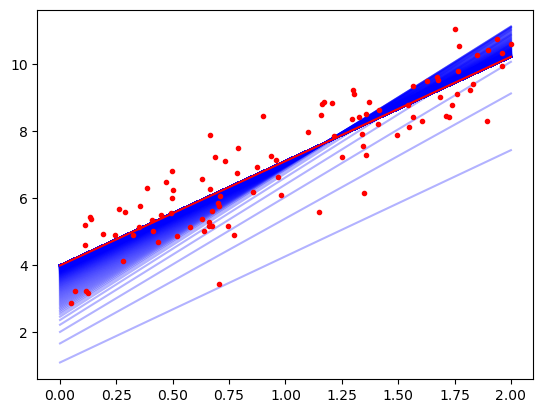

In [8]:
""" 경사하강법 구현 1: numpy 선형대수 기능을 이용해 naive하게 구현 """

eta = 0.1
n_iterations = 1000
m = 100

theta_batch = []

theta = np.random.randn(2, 1) # 무작위 초기화

print("초기 theta: [ {}, {} ]".format(theta[0, 0], theta[1, 0]))

for itereration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    t0 = theta[0, 0]
    t1 = theta[1, 0]
    theta_batch.append([t0, t1])
    plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "b-", alpha=0.3)

print("마지막 theta: [ {}, {} ]".format(theta[0, 0], theta[1, 0]))
plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "r-")
plt.plot(X, y, "r.")
plt.show()

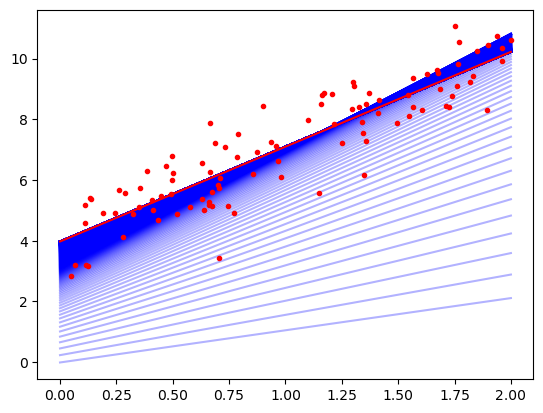

In [9]:
""" 예시2. 학습률을 작게 설정한 경우 """

eta = 0.02
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for itereration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    t0 = theta[0, 0]
    t1 = theta[1, 0]
    plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "b-", alpha=0.3)

plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "r-")
plt.plot(X, y, "r.")
plt.show()

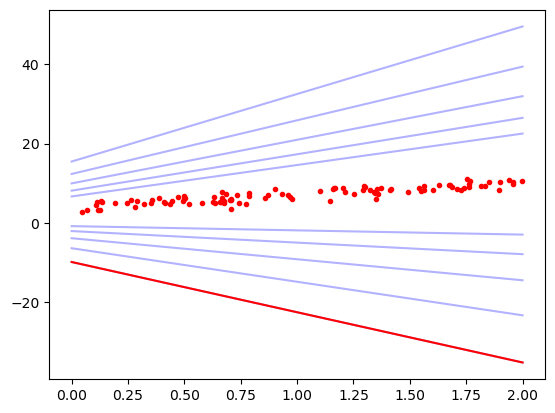

In [10]:
""" 예시3. 너무 큰 학습률을 설정할 경우 """

eta = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for itereration in range(10):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    t0 = theta[0, 0]
    t1 = theta[1, 0]
    plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "b-", alpha=0.3)

plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "r-")
plt.plot(X, y, "r.")
plt.show()

최적의 학습률을 찾으면서 훈련도 빠르게 하려면
1. GridSearchCV 활용
2. 조기 종료: 일단 반복 횟수를 크게 잡은 다음, 일정 정도 이상 개선이 안되면 그 때 훈련 중지<br>
\>>> 벡터의 노름이 어떤 값 ε(허용오차)보다 작아지면 거의 최소값에 도달한 것이기 때문

허용오차 $\epsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해선 $\mathbf{\mathit{O}}({1 \over \epsilon})$의 반복이 걸릴 수 있다<br>
즉 허용 오차를 $1\over10$로 줄이면 알고리즘 반복은 10배 늘어난다고 할 수 있다

### 확률적 경사 하강법

매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산<br>
\>>> 훈련셋을 다 써서 그래디언트를 계산하는 배치 경사 하강과의 차이<br>
- 장점: 빠름, 양이 많은 데이터도 학습 가능
- 단점: 배치 경사 하강법보다 불안정<br>
\>>> 학습 스케줄을 활용해 해결

학습 스케줄
- 매 반복에서 학습률(η)을 결정하는 함수
- 너무 빨리 줄어들면 지역 최소값에 갇히거나 최소값 도달 전에 종료한다
- 너무 느리게 줄어들면 최소값 주위만 맴돌다 훈련이 중지된다

In [11]:
X_b.size

200

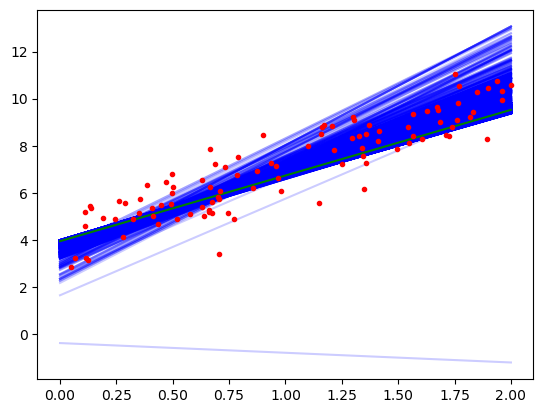

In [12]:
""" 
    SGD 구현 1: naive하게 전부 
    
        n_epoches: 전체 반복 횟수 (즉, theta를 조절할 횟수)
        t0, t1: 학습 스케줄 파라미터
        learning_schedule(t): 
"""

n_epochs = 50
t0, t1 = 5, 50
tx, ty = 0, 0

def learning_schedule(t): return t0 / (t + t1)

theta = np.random.randn(2, 1)

theta_sgd = []

for epoch in range(n_epochs): # 전체 반복 횟수: 50 * 200
    for i in range(X_b.size):
        random_index = np.random.randint(X_b.size) # 샘플 하나를 무작위로 고른 뒤
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 그 샘플을 이용해 그래디언트를 계산한다
        eta = learning_schedule(epoch * X_b.size + i) # 다음에 사용할 학습률: t = epoch * 200 + 0 ~ 199
        theta = theta - eta * gradients # 다음에 사용할 theta
        tx = theta[0, 0]
        ty = theta[1, 0]
        theta_sgd.append([tx, ty])
        plt.plot([[0], [2]], [[tx], [ty + 2 * ty]], "b-", alpha=0.2)

plt.plot([[0], [2]], [[tx], [ty + 2 * ty]], "g-")
plt.plot(X, y, "r.")
plt.show()

In [13]:
for epoch in range(n_epochs): # 전체 반복 횟수: 50 * 200
    for i in range(X_b.size):
        print("iter[ {}, {}: {} ] >>> {} ({} * {} + {} + {}): {}".format(epoch, i, (200*epoch+i), t0, epoch, 200, i, t1, learning_schedule(epoch * 200 + i)))

iter[ 0, 0: 0 ] >>> 5 (0 * 200 + 0 + 50): 0.1
iter[ 0, 1: 1 ] >>> 5 (0 * 200 + 1 + 50): 0.09803921568627451
iter[ 0, 2: 2 ] >>> 5 (0 * 200 + 2 + 50): 0.09615384615384616
iter[ 0, 3: 3 ] >>> 5 (0 * 200 + 3 + 50): 0.09433962264150944
iter[ 0, 4: 4 ] >>> 5 (0 * 200 + 4 + 50): 0.09259259259259259
iter[ 0, 5: 5 ] >>> 5 (0 * 200 + 5 + 50): 0.09090909090909091
iter[ 0, 6: 6 ] >>> 5 (0 * 200 + 6 + 50): 0.08928571428571429
iter[ 0, 7: 7 ] >>> 5 (0 * 200 + 7 + 50): 0.08771929824561403
iter[ 0, 8: 8 ] >>> 5 (0 * 200 + 8 + 50): 0.08620689655172414
iter[ 0, 9: 9 ] >>> 5 (0 * 200 + 9 + 50): 0.0847457627118644
iter[ 0, 10: 10 ] >>> 5 (0 * 200 + 10 + 50): 0.08333333333333333
iter[ 0, 11: 11 ] >>> 5 (0 * 200 + 11 + 50): 0.08196721311475409
iter[ 0, 12: 12 ] >>> 5 (0 * 200 + 12 + 50): 0.08064516129032258
iter[ 0, 13: 13 ] >>> 5 (0 * 200 + 13 + 50): 0.07936507936507936
iter[ 0, 14: 14 ] >>> 5 (0 * 200 + 14 + 50): 0.078125
iter[ 0, 15: 15 ] >>> 5 (0 * 200 + 15 + 50): 0.07692307692307693
iter[ 0, 16: 16 ] 

In [14]:
tx

3.94333927754314

In [15]:
ty

3.1747406799516087

In [16]:
theta

array([[3.94333928],
       [3.17474068]])

샘플이 무작위로 선택되기 때문에 한 샘플이 여러 번 선택받을 수도, 한 번도 선택받지 못할 수도 있다<br>
이를 방지하고자 sklearn SGDClassifier / regresser는
1. 훈련 세트를 섞은 후
2. 여기서 차례대로 하나 씩 선택하고
3. 다 선택하면 (위의 코드로 이야기하면 for i in range(X_b.size) 루프를 다 돌면) epoch마다 다시 섞는다<br>
(\>>> for epoch in range(n_epoches) 루프를 한 번 더 돈다고 볼 수 있다)

In [17]:
"""
    SGD 구현 2. sklearn 
    max_iter: 최대 epoch
    eta: 초기 학습률
"""

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [18]:
"""
    Model.intercept_: 편향 (즉 theta_0)
    Model.coef_: theta_0를 제외한 모델 파라미터
"""
sgd_reg.intercept_, sgd_reg.coef_

(array([3.99540501]), array([3.16068322]))

### 미니배치 경사 하강법

임의의 작은 샘플 세트(=미니배치)에 대해 그래디언트를 계산하는 방법<br>

SGD보다 덜 불규칙하게 움직인다
- \>>> +: SGD보다 최소값에 더 가까이 도달 가능
- \>>> -: SGD보다 지역 최소에서 빠져나오기 힘들 수도 있음
    
미니 배치랑 임의 분할 교차 검증이랑 비슷한 것 같다. 차이라면<br>
- 미니배치 GD: 적절한 모델 파라미터를 찾아가면서 모델을 """훈련""" 하는 기법
- 임의 분할 교차 검증: 찾아낸 모델 파라미터가 적절한지 """테스트""" 하는 기법

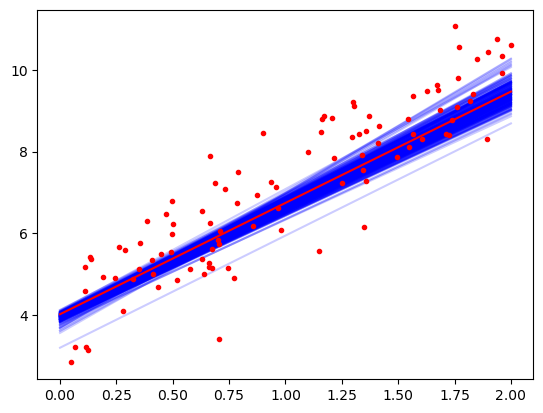

In [19]:
""" 미니배치 구현 1. naive """

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations): 
    shuffled_indices = np.random.permutation(m) # 에포크마다 훈련셋 섞기
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices] # 결과: shuffled_indices 순으로 훈련셋 재배열
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size] #미니배치 크기로 슬라이싱 >>> 20개씩 끊어먹기
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # 20개 훈련 샘플의 그래디언트 산출
        eta = learning_schedule(t) # 나머진 비슷한데 SGD에서 t0, t1이랑 여기서 t0, t1이 다른 이유를 모르겠다
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        plt.plot([[0], [2]], [[theta[0, 0]], [theta[1, 0] + 2 * theta[1, 0]]], "b-", alpha=0.2)

plt.plot([[0], [2]], [[theta[0, 0]], [theta[1, 0] + 2 * theta[1, 0]]], "r-")
plt.plot(X, y, "r.")
plt.show()

In [20]:
theta_batch = np.array(theta_batch)
theta_sgd = np.array(theta_sgd)
theta_path_mgd = np.array(theta_path_mgd)

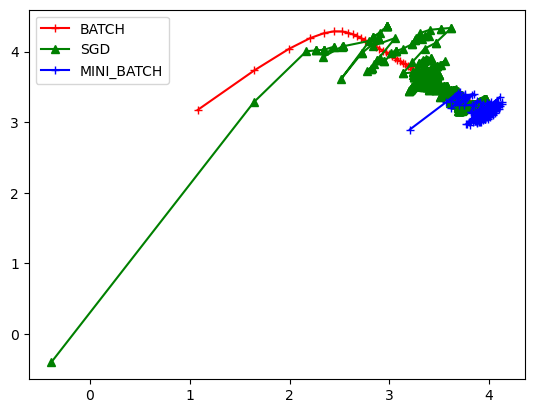

In [21]:
plt.plot(theta_batch[ : , 0], theta_batch[ : , 1], "r-+", label='BATCH')
plt.plot(theta_sgd[ : , 0], theta_sgd[ : , 1], "g-^", label='SGD')
plt.plot(theta_path_mgd[ : , 0], theta_path_mgd[ : , 1], "b-+", label='MINI_BATCH')
plt.legend()
plt.show()

### 주의사항

경사 하강법은 최적의 모델 파라미터를 찾아내는 방법이다 <br>
절대로, 모델을 만들어 내는 것이 아니다 <br>
fit, predict(proba) 했을 때 나오는 결과는 매개변수 loss마다 지정된 모델에 찾아낸 모델 파라미터를 적용시켜 훈련, 예측한 결과이다

# 다항 회귀

비선형 데이터도 선형 모델을 이용해 학습한다<br>
방법
1. 특성의 거듭제곱을 새로운 특성으로 추가한다<br>
다시 말해, 특성의 중복 조합만큼 새로운 특성을 추가한다
2. 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킨다

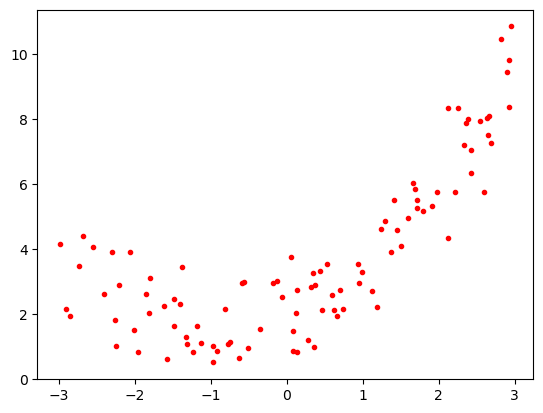

In [22]:
m = 100
X=  6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "r.")

In [23]:
"""
preprocessing.PolynormialFeatures(
    degree: 차수, 기본 2
    include_bias: 편향 추가 여부. 기본 True (x0=1 추가)
)
"""

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.38942838]), array([2.38942838, 5.709368  ]))

In [24]:
""" degree=2, include_bias=False : 특성 1 >>> (특성 1, 특성 1^2), 편향은 제외 """

poly_features.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [25]:
"""
    예측 결과: y hat = 0.48x^2 + 1.03x + 1.98
    >>> 1.98 + 1.03x + 0.48x^2
    >>> coef_[0] >>> 1차항 계수, coef_[1] >>> 2차항 계수
"""

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [26]:
""" 3차로 테스트 """

Xt = np.random.randn(100, 2)
yt = 0.5 * Xt ** 3 + Xt + 2 + np.random.randn(100, 2)

In [27]:
"""
    특성: 2개
    차수: 3차
    >>> (2 + 3) ! / 2!3! = 10 지만 include_bias=False면 9
    >>> ~ 같은 공 3개, 칸막이 2개를 배치하는 조합 수
"""

pf2 = PolynomialFeatures(degree=3, include_bias=False)
X_poly2 = pf2.fit_transform(Xt)
pf2.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [28]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly2, y)
lin_reg2.intercept_, lin_reg2.coef_

(array([4.1877883]),
 array([[ 0.92040662, -0.06916481, -0.49623423, -0.15190004,  0.07038048,
         -0.13065532, -0.19192795, -0.32341724,  0.1307819 ]]))

# 학습 곡선

학습 곡선?
- 모델을 검증하기 위한 방법 중 하나로
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸 것이다.
- 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시켜 만들어낸다

In [29]:
"""
model_selection.train_test_split(
    *arrays, : 나눌 데이터셋. 여러 개 가능. list, ndarray, sparse matrix, df
    test_size=None, train_size=None, : 테스트 / 훈련셋 비율
    random_state=None,
    shuffle=True
)
"""

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[ : m], y_train[ : m]) # 서브셋 생성  및 이를 이용한 모델 생성
        y_train_predict = model.predict(X_train[ : m]) # 훈련셋을 이용해 예측
        y_val_predict = model.predict(X_val) # 검증셋을 이용해 예측한 결과: 실제
        train_errors.append(mean_squared_error(y_train[ : m], y_train_predict)) # 훈련셋의 (y hat - y)^2 (MSE) 측정
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # 검증셋의 MSE 측정
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="validation")
    
    plt.legend()
    
    plt.xlabel("sizeof train set")
    plt.ylabel("RMSE")

코드 분석<br>
- 14: 훈련셋, 검증셋 분할 (여기선 테스트셋을 쓰지만 원래는 검증셋까지 나눠서 해야 한다)<br>
- 16\~21: 훈련셋을 키워나가면서 모델 fit \& predict, RMSE 산출<br>

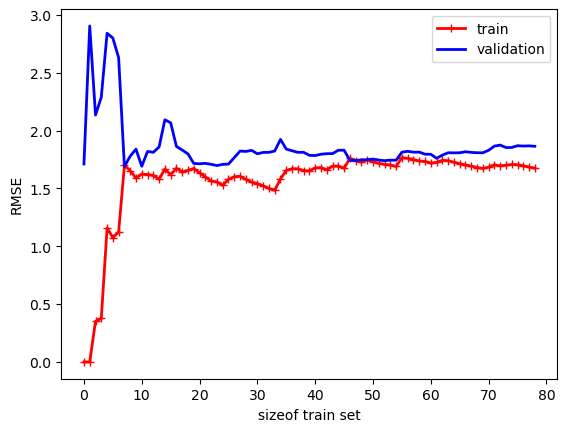

In [30]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

결과 분석<br>
- 샘플 1~2개만 이용해 훈련했을 때는 완벽하게 맞지만 샘플이 추가될 수록 완벽히 학습하는 것이 불가능해진다<br>
    - 평평해질 때까지 오차 상승
    - 평평해진 뒤에는 샘플을 추가해도 오차가 개선되지 않음
- 검증 세트의 샘플이 적을 땐 일반화가 잘 안되어 오차가 크다<br>
    - 샘플이 추가될 수록 오차가 감소한다
    - 훈련세트와 가까위지긴 함

*** 결론: 과소적합<br>
근거
1. 오차가 크다
2. 그 큰 오차에서 서로 가깝다

이 경우 샘플을 추가해도 효과는 없다<br>
대신 더 복잡한 모델과 더 나은 특성을 선택해야 한다

In [31]:
x1, y1 = train_test_split(np.random.randn(10), test_size=0.2)
x1

array([ 1.06394099,  1.10132296,  0.41820576,  0.42584366, -1.77601175,
       -0.60735443,  0.25256885,  0.44419833])

In [32]:
y1

array([-0.07722105,  1.38453205])

In [33]:
x1, x2, y1, y2 = train_test_split(np.random.randn(10), np.random.randint(0, 10, size=(10)), test_size=0.2)

In [34]:
x1, x2

(array([-0.40911661,  0.91509474, -0.68895841,  0.43414222,  1.43287243,
        -1.44272672,  0.42713373,  0.15710869]),
 array([ 1.23221396, -0.0185046 ]))

In [35]:
y1, y2

(array([2, 5, 5, 9, 7, 7, 2, 2]), array([2, 2]))

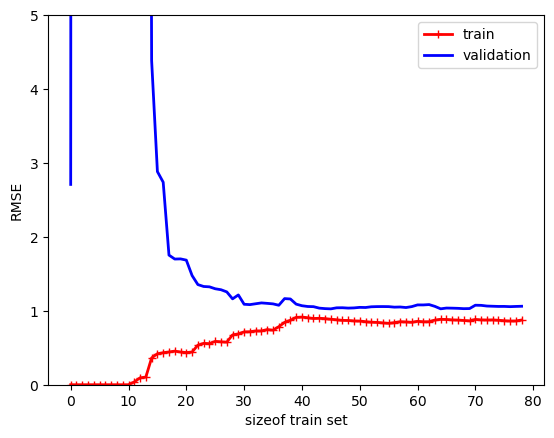

In [36]:
""" 개선 시도: 복잡한 모델(10차 다항 회귀 모델) 선택 """

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

plt.ylim([0, 5])

plt.show()

결과 분석
- 오차가 처음보다 낮아졌다
- 훈련셋의 오차보다 검증셋의 오차가 더 낮다<br>
    - 검증셋에서의 모델 성능이 훈련셋에서의 성능보다 낫다는 의미 >>> 낮선 데이터에도 잘 맞는다는 의미?
    - 만약 낮은 오차에서 훈련셋보다 검증셋의 오차가 더 크다면 훈련셋에 대해 과대적합했다고 볼 수 있다

### 편향 / 분산 트레이드오프

모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현 가능하다
    
1. 편향
    - 잘못된 가정으로 인해 발생하는 오차 (ex. 2차를 선형으로 가정)
    - 편향이 크면 과소적합되기 쉬움
    - 해결: 복잡도 증가, 규제 감소
2. 분산
    - 훈련 데이터의 변동에 모델이 과민 반응하는 경우에 발생
    - 자유도가 높은 모델은 과대적합되기 쉬움 >>> 특성이 많은 모델
    - 해결: 모델의 복잡도 감소, 규제 추가
3. 줄일 수 없는 오차
    - 데이터 자체에 있는 노이즈가 원인
    - 해결: 이상치 제거(~fillna) + 데이터 소스 점검 (성능 좋은 센서)

<br>
모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향이 줄어든다<br>
복잡도가 줄어들면 편향이 커지고 분산이 작아짐<br>
\>>> 즉, 편향과 분산은 트레이드오프 관계

# 규제가 있는 선형 모델

과대적합을 줄이기 위한 규제 방법
1. 자유도 감소 >>> 샘플에서 관련 없는 구성 요소 몇 개 제거
2. 차수 감소
3. 선형 회귀 모델에선 모델의 가중치 제한. 즉 $\theta$의 크기 조절

### 릿지 회귀 (티호노프 규제)

규제항 $\alpha \sum_{i=1}^n ({\theta_i}^2)$을 원 비용함수에 추가하는 방식<br>
모델을 데이터에 맞추면서 가중치는 가능한 작게 유지되도록 한다<br>
규제항은 훈련하는 동안에만 비용 함수에 추가하고, 훈련 종료 시엔 규제가 없는 성능 지표로 모델을 평가한다<br>
\>>> 즉, 규제는 적절한 모델 가중치(=파라미터)를 찾아내기 위해서만 사용하고, 모델 평가 시엔 찾아낸 파리미터를 이용한 모델을 이용해 규제항 없이 성능을 측정한다.

규제는 하이퍼파라미터 α로 강도를 조절한다. <br>
이 때
- $\alpha = 0$ >>> ~ 선형 회귀
- $\alpha \simeq \begin {cases} 1 \mbox{(scaled)} \\ \infty \mbox{(not scaled)} \end {cases} \mbox{then } \theta \simeq 0 $ >>> 이 경우 수평선과 비슷해진다


릿지 회귀의 비용 함수
> $\mathbf{\mathit{J}}(\theta) = MSE(\theta)+{\alpha \over 2} \sum_{i=1}^n({\theta_i}^2)$

이 때
- 편향($\theta_0$)는 비규제 >>> i = 0 to n (X), i = 1 to n (O)
- $\mathbf{w}$를 파라미터 벡터$(\theta_1 \cdots \theta_n)$라고 정의하면 규제항은 ${1 \over 2} { \begin {Vmatrix} \mathbf{w} \end {Vmatrix} }^2$와 같다. 즉 가중치 벡터의 l2 노름과 같다

규제 시 주의사항
- 입력 특성의 스케일에 민감하다 >>> 수행 전 데이터 스케일을 맞춰줘야 함

스케일링 목적: 이상치의 영향 감소, 단위 조정 등

규제항 원리
- α가 증가할 수록 비용함수 J(θ) 증가
- 규제항이 있다면 똑같은 파라미터를 쓰더라도 비용함수는 증가한다
- 때문에 규제항을 추가했을 때 비용함수와 추가 전의 비용함수 결과가 같으려면 똑같은 모델 파라미터를 쓰면 안된다
- 이 때 $\alpha=0$이라면 규제항은 없는 것이나 다름 없기 때문에 선형회귀와 같아지는 것이다
- $\alpha \simeq 1\mbox(scaled)$면 규제항의 영향력도 커지기 때문에 모델 파라미터가 매우 작아지는 것이다

릿지 회귀 계산
1. 정규방정식
> $\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X} + \alpha \mathbf{A})^{-1} \cdot \mathbf{X}^T \cdot y$ <br>
여기서<br>
$\mathbf{A}: $x0에 해당하는 맨 왼쪽 위의 원소가 0인 (n + 1) * (n + 1)의 단위행렬

2. 경사하강법

*** 장단점은 똑같음

In [37]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=5)

In [39]:
sgd_reg.coef_, sgd_reg.intercept_

(array([1.16535027]), array([2.6672027]))

### 라쏘 회귀

l1 노름을 사용하는 규제

비용 함수<br>
$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \begin {vmatrix} \theta_i \end {vmatrix}$


특징
- 덜 중요한 특성의 가중치는 완전히 0으로 만든다. 즉
    1. 특성을 자동으로 선택하고, 희소 모델을 만든다
    2. 0이 아닌 특성의 가중치 수가 적음
- 종착지로 가는 통로에서 지그재그로 튀는 경향을 보인다. 이는 $\theta=0$에서 갑자기 기울기가 바뀌기 때문이며, 전역 최소값에 수렴하기 위해선 학습률을 점진적으로 줄여야 한다
- $\theta_i=0$ (i=1, 2, ..., n)일때 미분 불가능하지만, 서브그래디언트 벡터 $\mathbf{g}$를 사용하면 경사하강법 적용이 가능하다
> 서브그래디언트 벡터? <br>
미분 불가능한 지점 근처 그래디언트의 중간값 <br>
라쏘 회귀의 서브그래디언트 벡터 $g$는 다음과 같이 나타낼 수 있다
$g(\theta, J) = \nabla MSE(\theta) + \alpha \begin {pmatrix} \mbox{sign}(\theta_1) \\ \mbox{sign}(\theta_2) \\ \vdots \\ \mbox{sign}(\theta_n) \\ \end {pmatrix}$<br>
이 때 <br>
$\mbox{sign}(\theta_i) = 
\begin {cases} 
-1 & (\theta_i\mbox{ < 0일 때}) \\ 
0 & (\theta_i\mbox{ = 0일 때}) \\ 
1 & (\theta_i\mbox{ > 0일 때}) 
\end {cases} $

In [40]:
""" 라쏘 회귀 예시 """

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09481859])

### 엘라스틱넷

릿지 X 라쏘
비용 함수
> $J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n \begin {vmatrix} \theta_i \end {vmatrix} +  {1-r \over 2}\alpha \sum_{i=1}^n {\theta_i}^2$

\>>> 릿지와 라쏘 규제항을 추가하고, 둘의 비율을 r로 조절하는 형태

회귀 모델 선정

0. 규제가 있긴 한 것이 대부분 좋음 (보통 회귀 모델은 지양)
1. 기본은 릿지
2. 특성은 많은데 실제로 쓰이는 건 별로 없을 것이라고 생각되면 라쏘, 엘라스틱넷
3. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 땐 엘라스틱넷<br>
    이유<br>
    - (특성 수 (m) < 샘플 수 (n))이면 최대 n개 특성까지만 고르고 나머진 버리기 때문
    - 여러 특성이 강하게 연관되어 있으면 그 중 하나만 고르기 때문 (즉 다 필요한 것인데 버리기 때문)

In [41]:
""" 엘라스틱넷 예시: 비율 r은 매개변수 l1_ratio(라쏘 비율)로 조절한다 """

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # >>> 반반씩 채택
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

### 조기 종료

검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것<br>
아이디어 상세
1. 훈련 중 어느 시점이 되면 검증 세트에 대한 오차가 가장 적은 지점에 도달한다
2. 여기서 더 학습하면 다시 오차가 상승한다. 즉 전체 훈련셋에 과대적합되기 시작한다
3. 이를 방지하기 위해 1의 지점을 기억해두었다 반복해도 성능이 개선되지 않는다고 판단되면 기억해두었던 때로 복귀한다


주의: 확률적 경사하강법, 미니배치의 경우 오차 곡선이 매끄럽지 않아 최소값 도달 여부 확인이 어려울 수 있다 <br>
해결 방법
1. """ 일정 시간 """ 동안 모델이 나아지지 않을 때 복귀
2. """ 일정 범위? """ 보다 높아지면 복귀 (낮아지면 오히려 좋은 것) 

In [49]:
""" 조기 종료 구현 """

"""
    *** 실행하면 오류 발생할 것 
    >>> 훈련셋, 검증셋 분할 후 진행 필요
"""

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("pol_feats", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # 훈련셋을 다항 회귀에 적합한 형태로 변형 + 스케일링
X_val_poly_scaled = poly_scaler.transform(X_val) # 검증셋도 변형 + 스케일링

sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimim_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # 1. 훈련셋으로 모델 구축
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # 2. 1에서 생성한 모델로 검증셋 예측
    val_error = mean_squared_error(y_val, y_val_predict) # 3. 원본과 검증셋으로 예측한 수치의 MSE 산출
    if val_error < minimim_val_error: # 4.1 새 MSE < 기존 MSE일 경우
        minimim_val_error = val_error # 4.2 가장 작은 MSE = 새 MSE
        best_epoch = epoch # 최선의 에포크 = 현재 에포크
        best_model = clone(sgd_reg) # 최선의 모델 = 현재 모델

In [50]:
best_epoch

450

In [51]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
             penalty=None, warm_start=True)

# 로지스틱 회귀

In [41]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
X = iris["data"][ : , 3 : ]
y = (iris["target"] == 2).astype(np.int8)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [46]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

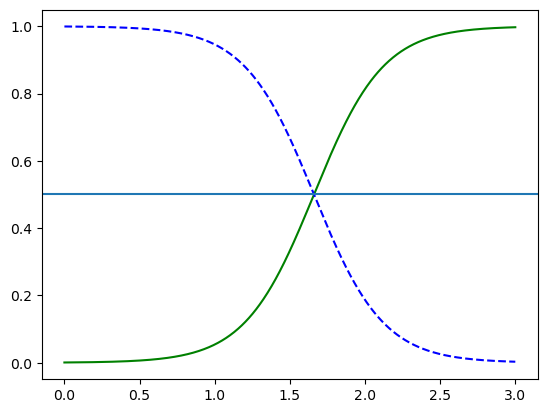

In [47]:
plt.plot(X_new, y_proba[ : , [1]], "g-", label="Iris-virginica")
plt.plot(X_new, y_proba[ : , [0]], "b--", label="not Iris-virginica")
plt.axhline(0.5)
plt.show()

In [48]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int8)

In [49]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

### 소프트맥스 회귀

In [71]:
X = iris["data"][ : , (2, 3)]
y = iris["target"]

In [72]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [73]:
softmax_reg.predict([[5, 2]])

array([2])

In [74]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])